In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
df_wifi=pd.read_csv('data/8. Base de puntos de WiFi gratuitos en Bogotá (2021).csv', delimiter=';',encoding='latin-1')

In [3]:
df_wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MUNICIPIO         219 non-null    object
 1   NOMBRE ZONA WIFI  219 non-null    object
 2   DIRECCION         219 non-null    object
 3   LONGITUD          219 non-null    object
 4   LATITUD           219 non-null    object
dtypes: object(5)
memory usage: 8.7+ KB


In [4]:
df_wifi.columns=["municipio","nombre_zona_wifi","direccion","longitud","latitud"]

In [5]:
df_wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         219 non-null    object
 1   nombre_zona_wifi  219 non-null    object
 2   direccion         219 non-null    object
 3   longitud          219 non-null    object
 4   latitud           219 non-null    object
dtypes: object(5)
memory usage: 8.7+ KB


In [6]:
df_wifi["latitud"]=df_wifi["latitud"].str.replace(",",".")
df_wifi["longitud"]=df_wifi["longitud"].str.replace(",",".")

In [7]:
df_wifi["longitud"]=df_wifi["longitud"].str.replace(" ", "")

In [8]:
df_wifi["latitud"]=df_wifi["latitud"].astype(float)
df_wifi["longitud"]=df_wifi["longitud"].astype(float)

In [9]:
some_map=folium.Map(location=[df_wifi["latitud"].mean(),df_wifi["longitud"].mean()],zoom_start=10)

In [10]:
for row in df_wifi.itertuples():
    
    some_map.add_child(folium.Marker(location=[row.latitud,row.longitud],popup=row.municipio))

In [11]:
some_map

<AxesSubplot:title={'center':'# Zonas wifi por Municipo'}, ylabel='municipio'>

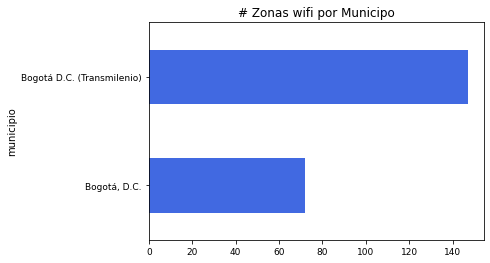

In [18]:
df_wifi.groupby(["municipio"])["municipio"].count().sort_values(ascending=True).plot.barh(
                                                                                                title="# Zonas wifi por Municipo",
                                                                                                color="royalblue",fontsize=9)

In [16]:
df_wifi["municipio"].value_counts()

Bogotá D.C. (Transmilenio)    147
Bogotá, D.C.                   72
Name: municipio, dtype: int64

In [17]:
df_wifi


,municipio,nombre_zona_wifi,direccion,longitud,latitud
0,"Bogotá, D.C.",PARQUE SAN ANDRÉS,KR 102 Y 100 CON CALLE 82 Y 80,-74.110069,4.712825
1,"Bogotá, D.C.",PARQUE SIMON BOLÍVAR - \nUNIDAD DEPORTIVA SALI...,CALLE 63 N° 68 - 45,-74.095351,4.665885
2,"Bogotá, D.C.",PARQUE SIMON BOLÍVAR - UNIDAD DEPORTIVA SALITR...,CALLE 63 N° 68 - 45,-74.098498,4.664629
3,"Bogotá, D.C.",PARQUE SIMON BOLÍVAR - CASCADA 1,ENTRE CALLES 63 Y 53 Y CARRERAS 60 Y AVENIDA C...,-74.090740,4.660727
4,"Bogotá, D.C.",PARQUE SIMON BOLÍVAR - CASCADA 2,ENTRE CALLES 63 Y 53 Y CARRERAS 60 Y AVENIDA C...,-74.090740,4.660727
...,...,...,...,...,...
214,"Bogotá, D.C.",Plaza fundacional,Cra 91 # 145A - 32,-74.083814,4.740861
215,"Bogotá, D.C.",Parque Aures 2,Cr 105b #129d - 92,-74.101111,4.731944
216,"Bogotá, D.C.",Plazoleta IED Ciudad de Bogotá en el barrio Sa...,Transversal 6 Este # 33-30 Sur Barrio: San Vic...,-74.095965,4.554837
217,"Bogotá, D.C.",Campin,Ak 30 #34S30,-74.095964,4.554840
